# **MODEL TASNIFI:**

Bank mijozlari haqida maʼlumotlar toʻplami berilgan. Maqsad – qaysi mijozlar bank xizmatlaridan voz kechishini (churn) oldindan bashorat qilish. Bank bu orqali oʻz mijozlarini ushlab qolish strategiyalarini yaxshilashi mumkin.

# **MA'LUMOTLAR TO'PLAMI:**

Kaggle platformasidagi Churn Modelling maʼlumotlar toʻplamidan foydalanamiz. Ushbu toʻplamda 10 000 ta mijozning quyidagi maʼlumotlari mavjud:

mijoz identifikatori (RowNumber, CustomerId, Surname);

geografik joylashuvi (Geography);

jinsi (Gender);

yoshi (Age);

kredit balli (CreditScore);

yillik daromadi (EstimatedSalary);

bankda qancha vaqtdan beri mijoz ekani (Tenure);

qancha mahsulotdan foydalanishi (NumOfProducts);

faoliyati (HasCrCard, IsActiveMember);

balans (Balance);

prognoz qilish holati, churn (Exited) – maqsadli oʻzgaruvchi.

# **QADAMLAR:**

*Maʼlumotlarni tahlil qilish va tozalash:*

Maʼlumotlardagi boʻsh qiymatlar va anomaliyalarni aniqlaSH hamda tozalash.
Kategorik oʻzgaruvchilarni raqamli koʻrinishga oʻtkazish (masalan, one-hot encoding yordamida).

*Maʼlumotlarni boʻlish:*

Maʼlumotlarni training va test toʻplamlariga ajratish (masalan, 80% training, 20% test).

*Model qurish:*

Quyidagi algoritmlar yordamida modellarni yaratish:
Logistic Regression
Support Vector Machine (SVM)
Decision Tree
Random Forest
XGBoost

*Modellarni baholash:*

Har bir model uchun quyidagi koʻrsatkichlarni hisoblash:
Aniqlik (Accuracy)
Toʻgʻrilik (Precision)
Recall
F1-score

*Natijalarni tahlil qilish:*

Olingan natijalarni solishtirish va qaysi model eng yaxshi ishlashini aniqlash.
Eng yaxshi model asosida bankka mijozlarni ushlab qolish boʻyicha tavsiyalar berish.

# **KERAKLI BARCHA KUTIBXONALARNI CHAQIRIB OLAMIZ:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, jaccard_score
from sklearn import metrics
from sklearn.cluster import KMeans

# **TRAIN.CSV NI O'QIB OLAMIZ VA BOSHLANG'ICH TAHLILNI BOSHLAYMIZ:**

In [3]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.579454e+07,657.856800,37.710133,5.018667,42338.107539,1.590533,0.779133,0.496000,116944.059867,0.198467
std,4330.271354,1.268495e+07,72.678739,8.144880,2.787407,59703.047751,0.525822,0.414845,0.500001,46047.485455,0.398859
min,0.000000,1.567151e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563435e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82644.332500,0.000000
50%,7499.500000,1.568947e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122449.420000,0.000000
75%,11249.250000,1.575682e+07,707.000000,42.000000,7.000000,109636.342500,2.000000,1.000000,1.000000,155703.022500,0.000000
max,14999.000000,1.569172e+09,850.000000,72.000000,10.000000,187911.550000,5.000000,1.000000,1.000000,885120.790000,1.000000


In [5]:
df.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [15]:
#bazi ustunlar orasidagi tarqalishni ko'ramiz:

df.groupby('Exited')['IsActiveMember'].value_counts()

Exited  IsActiveMember
0.0     1.0               6528
        0.0               5495
1.0     0.0               2065
        1.0                912
Name: count, dtype: int64

In [8]:
df.groupby('Exited')['HasCrCard'].value_counts()

Exited  HasCrCard
0.0     1.0          9394
        0.0          2629
1.0     1.0          2293
        0.0           684
Name: count, dtype: int64

In [9]:
df.groupby('Exited')['Geography'].value_counts()

Exited  Geography
0.0     France       7649
        Spain        2782
        Germany      1592
1.0     France       1391
        Germany      1088
        Spain         498
Name: count, dtype: int64

In [16]:
df.groupby('Exited')['NumOfProducts'].value_counts()

Exited  NumOfProducts
0.0     2.0              8057
        1.0              3954
        3.0                 9
        4.0                 3
1.0     1.0              2425
        2.0               349
        3.0               185
        4.0                17
        5.0                 1
Name: count, dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [17]:
df['Exited'].value_counts()

,count
Exited,
0.0,12023
1.0,2977


<Axes: xlabel='Exited', ylabel='count'>

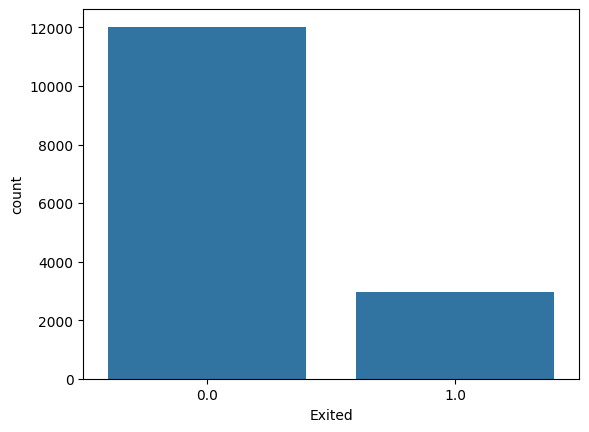

In [19]:
sns.countplot(x='Exited', data = df)

In [6]:
df.drop(['Surname', 'CustomerId'], axis=1, inplace=True)

# **SURNAME VA CUSTOMERID USTUNLARI TASHLAB YUBORILDI, CHUNKI ULAR MODELGA TASIR QILMAYDI. ENDI 2 TA CATEGORICAL USTUNLARNI LABEL VA ONEHOT ENCODING QILAMIZ. SO'NGRA TRAIN VA TESTLARGA AJRATAMIZ.**

In [11]:
la_encoder = LabelEncoder()
df.Gender = la_encoder.fit_transform(df.Gender)

In [12]:
df.Geography.value_counts()

,count
Geography,
France,9040
Spain,3280
Germany,2680


In [13]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[['Geography']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Geography']))
df = df.drop('Geography', axis=1)
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)
df

,id,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0,567.0,1,33.0,9.0,0.00,2.0,1.0,0.0,156792.89,0.0,0.0,0.0
1,1,628.0,0,38.0,3.0,0.00,1.0,1.0,1.0,51987.99,1.0,0.0,0.0
2,2,635.0,0,29.0,3.0,0.00,2.0,1.0,1.0,113079.19,0.0,0.0,0.0
3,3,681.0,1,28.0,6.0,0.00,2.0,1.0,0.0,14081.64,0.0,0.0,0.0
4,4,587.0,0,27.0,5.0,0.00,2.0,1.0,0.0,158958.90,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,581.0,1,35.0,1.0,0.00,2.0,1.0,0.0,161653.50,0.0,0.0,0.0
14996,14996,806.0,1,42.0,1.0,129120.64,2.0,1.0,1.0,161642.08,0.0,1.0,0.0
14997,14997,620.0,0,29.0,7.0,0.00,2.0,1.0,1.0,161579.85,0.0,0.0,0.0
14998,14998,622.0,1,51.0,6.0,106070.89,3.0,1.0,0.0,136869.31,1.0,1.0,0.0


In [14]:
#ustunlar orasidagi korrelyatsiyani tekshiramiz:

df.corrwith(df['Exited']).abs().sort_values(ascending=False)

,0
Exited,1.000000
Age,0.449425
NumOfProducts,0.312812
Geography_Germany,0.242651
IsActiveMember,0.188748
Gender,0.169465
Balance,0.160062
Geography_Spain,0.061859
CreditScore,0.052375
EstimatedSalary,0.035193


In [20]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **MODELLAR YARATAMIZ:**

0.8913333333333333
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      2424
         1.0       0.76      0.64      0.69       576

    accuracy                           0.89      3000
   macro avg       0.84      0.80      0.81      3000
weighted avg       0.89      0.89      0.89      3000

[[2305  119]
 [ 207  369]]


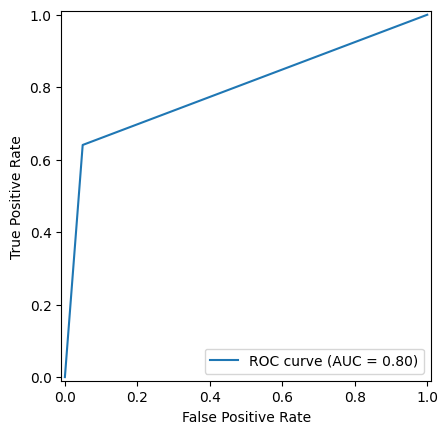

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Model aniqligi:  0.834
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90      2424
         1.0       0.56      0.62      0.59       576

    accuracy                           0.83      3000
   macro avg       0.73      0.75      0.74      3000
weighted avg       0.84      0.83      0.84      3000

[[2143  281]
 [ 217  359]]


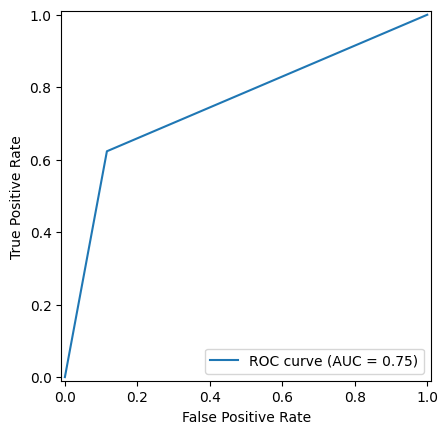

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

y_predict = tree_model.predict(x_test)

print("Model aniqligi: ", metrics.accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Model aniqligi:  0.888
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      2424
         1.0       0.73      0.66      0.69       576

    accuracy                           0.89      3000
   macro avg       0.83      0.80      0.81      3000
weighted avg       0.88      0.89      0.89      3000

[[2282  142]
 [ 194  382]]


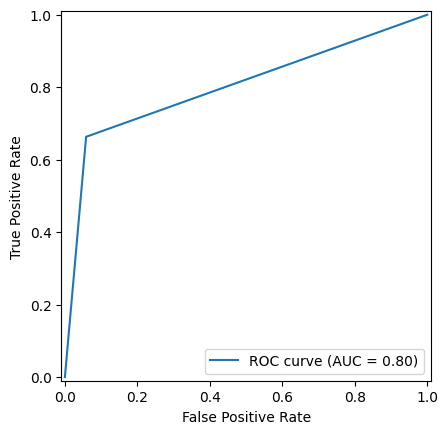

In [ ]:
xbg_model = XGBClassifier()
xbg_model.fit(x_train, y_train)

y_pre = xbg_model.predict(x_test)

print("Model aniqligi: ", metrics.accuracy_score(y_test, y_pre))
print(classification_report(y_test, y_pre))
print(confusion_matrix(y_test, y_pre))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pre)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Model aniqligi:  0.873
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      2424
         1.0       0.73      0.53      0.62       576

    accuracy                           0.87      3000
   macro avg       0.81      0.74      0.77      3000
weighted avg       0.86      0.87      0.87      3000

[[2311  113]
 [ 268  308]]


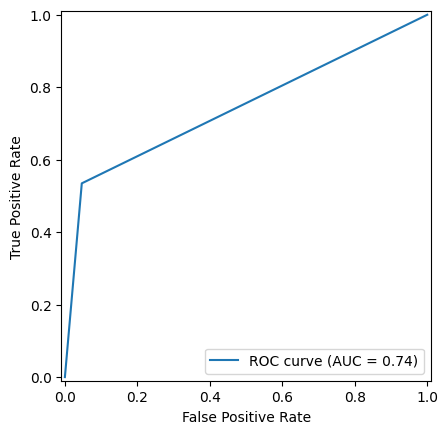

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

y_predicttt = lg_model.predict(x_test)

print("Model aniqligi: ", metrics.accuracy_score(y_test, y_predicttt))
print(classification_report(y_test, y_predicttt))
print(confusion_matrix(y_test, y_predicttt))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicttt)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Model aniqligi:  0.893
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2424
         1.0       0.77      0.63      0.69       576

    accuracy                           0.89      3000
   macro avg       0.84      0.79      0.81      3000
weighted avg       0.89      0.89      0.89      3000

[[2316  108]
 [ 213  363]]


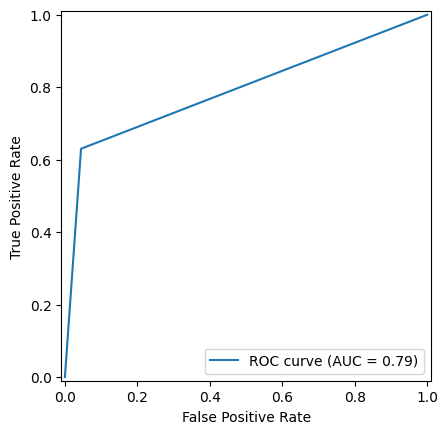

In [ ]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

y_p = svc_model.predict(x_test)

print("Model aniqligi: ", accuracy_score(y_test, y_p))
print(classification_report(y_test, y_p))
print(confusion_matrix(y_test, y_p))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_p)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# **5 TA MODEL ORQALI BASHORAT QILIB KO'RDIM, ENG YAXSHI NATIJA RANDOMFOREST BO'LDI. ACCURACY : 0,893 YA'NI 89,3 FOIZ. ROCAUC YA'NI MODELNING UMUMIY AJRATISH KUCHI ESA 0,80. AUC QANCHALIK 1.0 GA YAQIN BO'LSA MODEL SHUNCHALIK YAXSHI DEGANI. ENDI SHU MODELNI TEST SET BILAN TEST QILISH QOLDI XOLOS.**

In [ ]:
test_df = pd.read_csv('test.csv')
test_df.drop(['Surname', 'CustomerId'], axis=1, inplace=True)
test_df['Gender'] = la_encoder.transform(test_df['Gender'])
encoded = encoder.transform(test_df[['Geography']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Geography']))
test_df = test_df.drop('Geography', axis=1)
test_df = pd.concat([test_df.reset_index(drop=True), encoded_df], axis=1)

In [ ]:
customer_idlari = test_df['id']

In [ ]:
scaled_df = scaler.transform(test_df)

In [ ]:
y_final = random_forest.predict_proba(scaled_df)[:,1]

In [ ]:
submission_df = pd.DataFrame({'id': customer_idlari, 'Exited': y_final})
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df.head(15)

,id,Exited
0,15000,0.18
1,15001,0.30
2,15002,0.39
3,15003,0.11
4,15004,0.12
5,15005,0.62
6,15006,0.12
7,15007,0.42
8,15008,0.11
9,15009,0.57


BANKGA BERADIGAN MASLAHATLARIM :

1) 3 TA DAVLATDAN MIJOZLAR BOR EKAN. GERMANIYALIK MIJOZLARGA KO'PROQ E'TIBOR QARATISH KERAK. CHUNKI ENG KO'P KETIB QOLGAN MIJOZLAR SHU DAVLATNING AHOLISI.

2) FAQAT 1 TA MAHSULOTDAN FOYDALANADIGAN MIJOZLAR YAQQOL AJRALIB TURIBDI. 1800 NAFARI KETIB QOLGAN. DEMAK MIJOZLARGA KO'PROQ MAHSULOT TAKLIF QILISHINGIZ KERAK.

3) MIJOZNING FAOLIYATI HAM MUHIM O'RIN TUTAR EKAN. ASOSAN KREDIT KARTASI YO'Q BO'LGAN MIJOZLAR KETIB QOLGAN. MIJOZNI "ISACTIVEMEMBER" KATEGORIYASINI YA'NI KO'PROQ ACTIVE QILISH UCHUN BU MUAMMONI BARTARAF QILISH KERAK